In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uae-cancer-patient-dataset/_cancer_dataset_uae.csv


**Welcome to this interactive and evolving notebook where we dive deep into an anonymized dataset of cancer patients in the UAE. Through this analysis, we aim to uncover meaningful patterns related to demographics, cancer types, stages, treatment pathways, and outcomes**.

In this notebook, you’ll find:

📌 Clean and well-commented Exploratory Data Analysis (EDA)

📊 Visualizations to make sense of trends in age, gender, cancer types, and treatment timelines

💡 Insights that could inform further research or healthcare decision-making

Whether you're a researcher, data enthusiast, or just curious — there's something here for you.

🔄 Check back regularly! This notebook will be updated frequently with new visualizations, deeper analysis, and predictive modeling!
Don't forget to leave feedback or upvote if you find it helpful

# IMPORT LIBRARIES
importing the essential libraries for data visualization and configuring for a smooth analysis.

In [2]:
# Import core visualization libraries
import matplotlib.pyplot as plt  # For basic plotting (line, bar, scatter, etc.)

import seaborn as sns  # For advanced, attractive statistical plots

from datetime import datetime

# Suppress warnings to keep the output clean / Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Import Dataset
UAE Cancer Patient Dataset from kaggle

In [3]:
cancer = pd.read_csv('/kaggle/input/uae-cancer-patient-dataset/_cancer_dataset_uae.csv')

# Overview of the Dataset

In [4]:
#summary of the dataframe
cancer

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


In [5]:
cancer.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [6]:
print('shape', cancer.shape) # show all total rows and columns in dataset

shape (10000, 20)


In [7]:
cancer.isna().sum().sort_values(ascending=True)  # Check for missing values

Patient_ID                 0
Ethnicity                  0
Smoking_Status             0
Outcome                    0
Primary_Physician          0
Hospital                   0
Weight                     0
Treatment_Type             0
Treatment_Start_Date       0
Cancer_Type                0
Diagnosis_Date             0
Emirate                    0
Nationality                0
Gender                     0
Age                        0
Cancer_Stage               0
Height                     0
Comorbidities           4047
Death_Date              9008
Cause_of_Death          9008
dtype: int64

**Comorbidities (other related health condition)** has 4047 missing values, which suggests that not all patient exibited other health conditions so we keep that column intack 

**Cause_of_Death** and **Death_Date** have 9008 missing values, likely because not all patients have deceased, which might explain the missing data for these fields.

Other columns such as **Patient_ID**, **Age**, **Gender**, **Cancer_Type**, etc., have no missing values, indicating the dataset is mostly complete in these columns.

In [8]:
cancer.duplicated().sum() # Check for duplicate rows

0

From the dataset no row is duplicated (0) so no duplicates to drop

In [9]:
cancer.describe() # Get descriptive statistics of columns with numeric columns

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


## Descriptive Statistics

This will help us better understand the distribution, central tendency, and spread of the data.

**For Age**: The mean gives us the average age of the patients in the dataset. 
The std tells us how much the ages vary around the mean. 
The min and max will show us the range of ages.
The percentiles will help identify if the data is skewed (e.g., if the median is significantly lower or higher than the mean).

**For Weight**: The mean weight will help gauge the typical body weight of the individuals in the sample
The std will tell us if there’s significant variation in the weights. 
The percentiles will reveal whether there are any extreme weight values (outliers).

**For Height**: Similar to Weight, mean will help us know the average height,
Percentiles can show if there's any skewness in the data distribution (e.g., if most patients are around a certain height).


## Visualizing distribution for numerical columns

# Histograms for Age, weight and Height

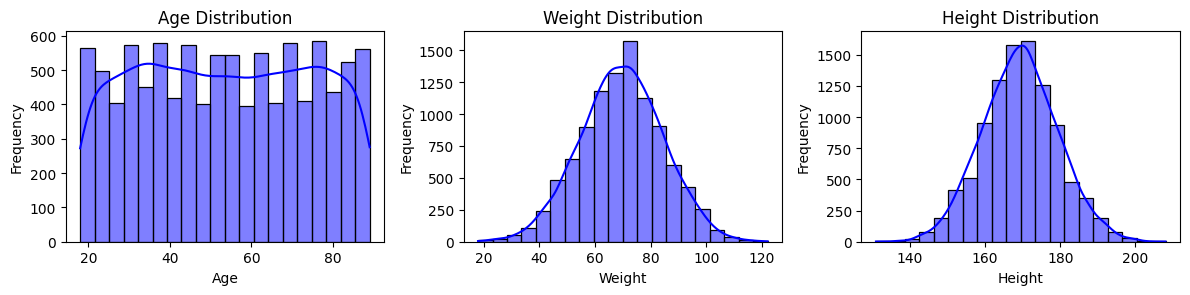

In [10]:
# Plot histograms for numerical columns
numerical_cols = cancer.select_dtypes(include=['float64', 'int64']).columns  # Identify numerical columns

# Set up the plot grid
plt.figure(figsize=(12, 8))

# Loop through each numerical column and plot a histogram
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of numerical columns
    sns.histplot(cancer[col], kde=True, bins=20, color='blue')  # KDE (Kernel Density Estimate) for smooth curve
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # this prevent overlap
plt.show()


# Boxplots for Age, weight and Height

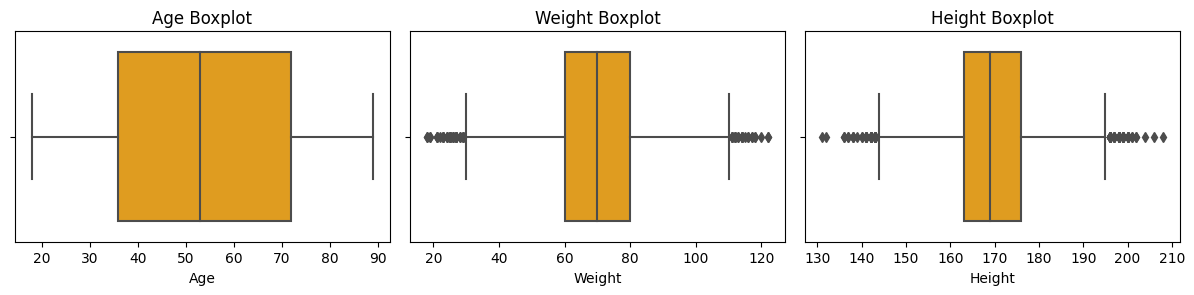

In [11]:
# Plot boxplots for numerical columns to detect outliers
plt.figure(figsize=(12, 8))

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=cancer, x=col, color='orange')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


# Plotting Correlation Heatmap for Age, weight and Height

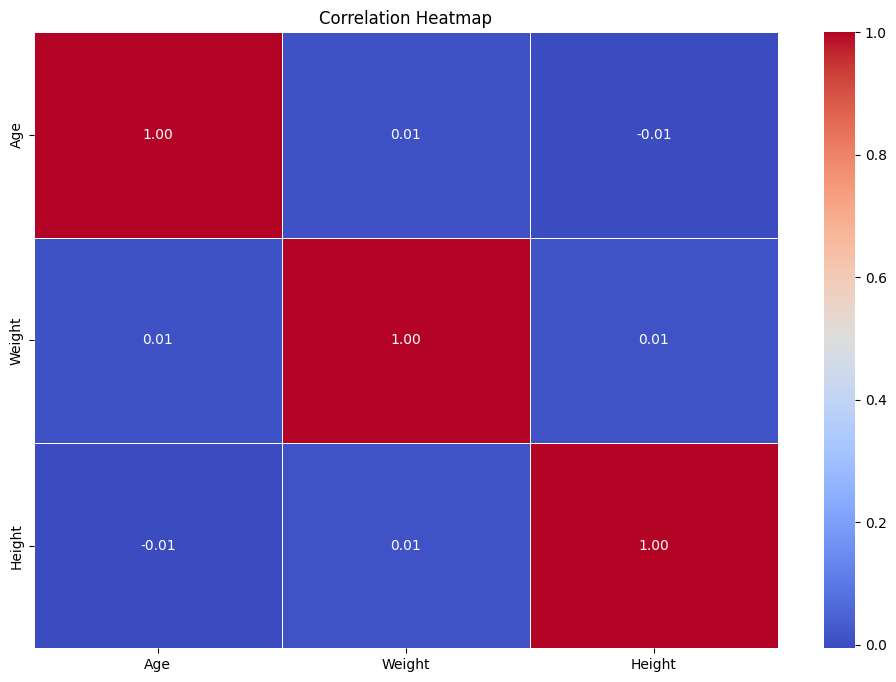

In [12]:
# Select numerical columns from the DataFrame
numerical_cols = cancer.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Summary of Visuals 
Histograms will give us a clear view of how each numerical feature is distributed (normal, skewed, etc.).

Boxplots will help us identify potential outliers in the data.

Correlation analysis will help us understand how numerical features relate to each other, highlighting any strong or weak correlations.

array(['61-70years', '31-40years', '>80years', '71-80years', '41-50years',
       '<20years', '51-60years', '21-30years'], dtype=object)

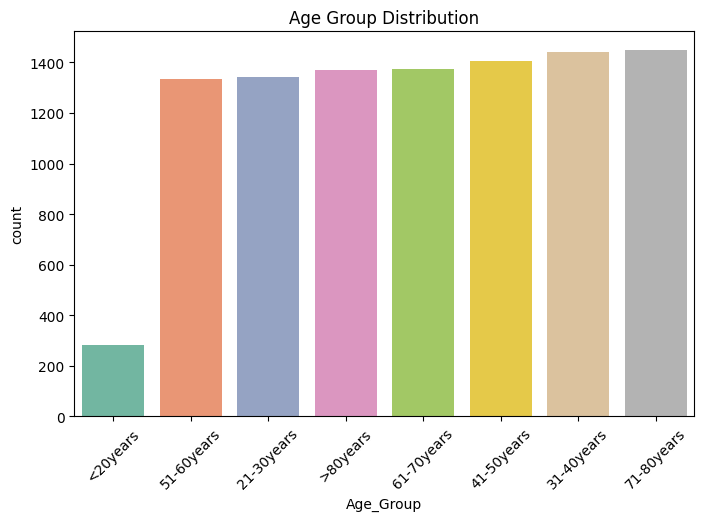

In [13]:
# Here we categorize our age 
#function to categorize Age
def categorize_Age(agegrp):
    if pd.isna(agegrp):
        return 'Unknown'
    elif agegrp < 20:
        return '<20years'
    elif 21 <= agegrp <= 30:
        return '21-30years'
    elif 31 <= agegrp <= 40:
        return '31-40years'
    elif 41 <= agegrp <= 50:
        return '41-50years'
    elif 51 <= agegrp <= 60:
        return '51-60years'
    elif 61 <= agegrp <= 70:
        return '61-70years'
    elif 71 <= agegrp <= 80:
        return '71-80years'
    else:
        return '>80years'

# Apply the function and create a new column
cancer['Age_Group'] = cancer['Age'].apply(categorize_Age)

# Sort the 'Age_Group' column and pass the sorted order to the countplot
sorted_age_groups = cancer['Age_Group'].value_counts().sort_values().index

#visualize
plt.figure(figsize=(8, 5))
sns.countplot(data=cancer, x='Age_Group', order=sorted_age_groups, palette='Set2')
plt.xticks(rotation=45)
plt.title('Age Group Distribution')

# View the result
cancer['Age_Group'].unique()

In [14]:
#Gender distribution
cancer['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
cancer['Gender'].value_counts(normalize=True).mul(100).round(2) #Check the percentage distibution of gender to 2 decimal places

Gender
Female    49.85
Male      48.27
Other      1.88
Name: proportion, dtype: float64

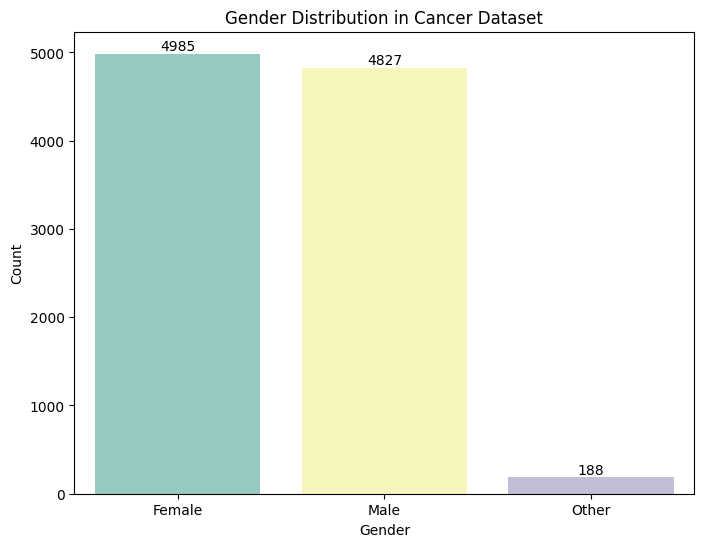

In [16]:
#Visualize gender distribution
plt.figure(figsize=(8,6))
sns.countplot(data=cancer, x='Gender', palette='Set3')
plt.bar_label(plt.gca().containers[0])  # Add count labels to bars
plt.xlabel('Gender')  # Optional: Add axis labels for clarity
plt.ylabel('Count')
plt.title('Gender Distribution in Cancer Dataset')
sns.set_style("whitegrid")
plt.show() 


Exploring ethnicity

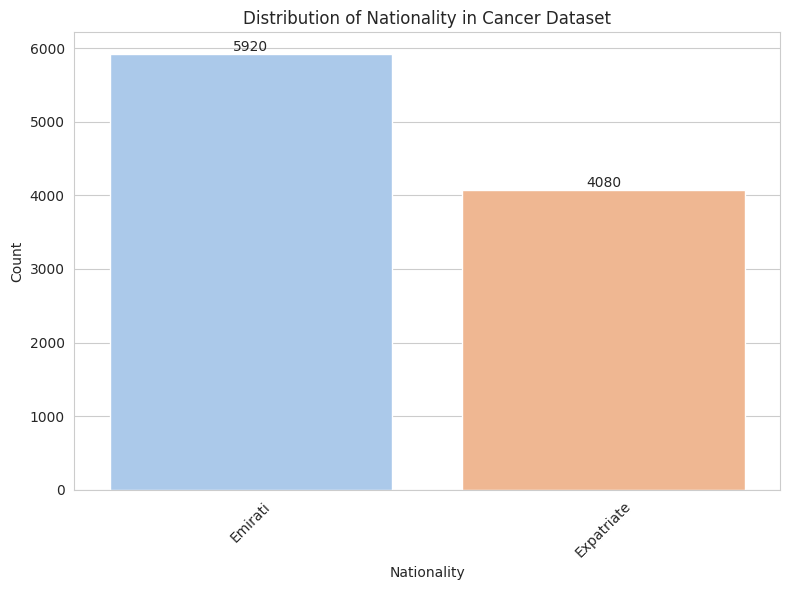

In [17]:
#Visualize nationality distribution
plt.figure(figsize=(8,6))
sns.countplot(data=cancer, x='Nationality', palette='pastel')
plt.bar_label(plt.gca().containers[0])
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Nationality in Cancer Dataset')
plt.xticks(rotation=45)  # rotates x-axis labels if they overlap
plt.tight_layout()       # ensures layout fits well
plt.show() 


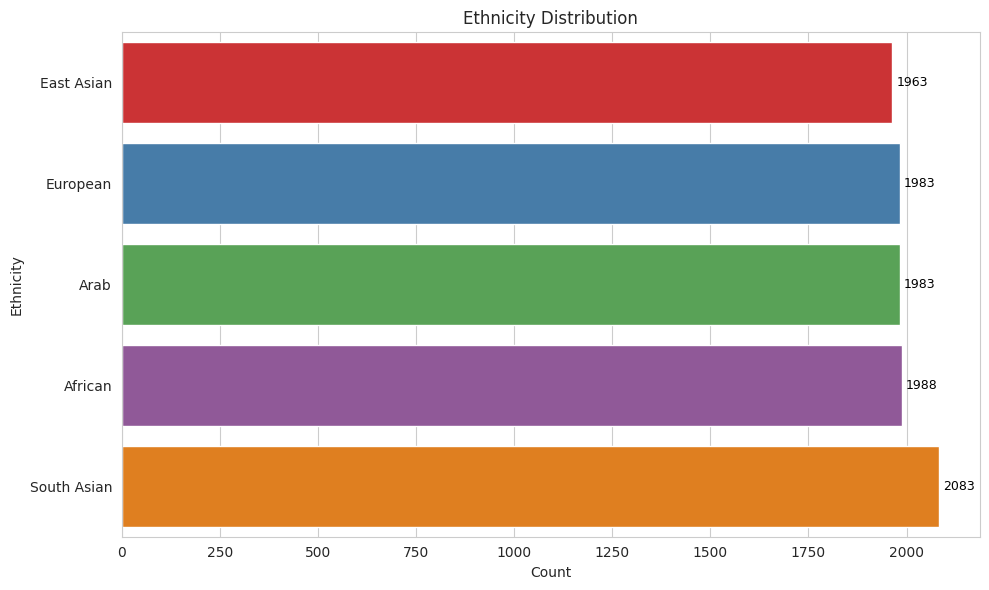

In [18]:
#Visualize Ethnicity distribution
# Sort ethnicity values by ascending frequency
sort_ethnicity = cancer['Ethnicity'].value_counts(ascending=True).index

plt.figure(figsize=(10, 6))
sns.countplot(
    data=cancer[cancer['Ethnicity'].notnull()],  # this line helps avoids plotting NaN
    y='Ethnicity',
    order=sort_ethnicity,
    palette='Set1'
)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.bar_label(plt.gca().containers[0], label_type='edge', fontsize=9, padding=3, color='black')
plt.tight_layout()
plt.show()



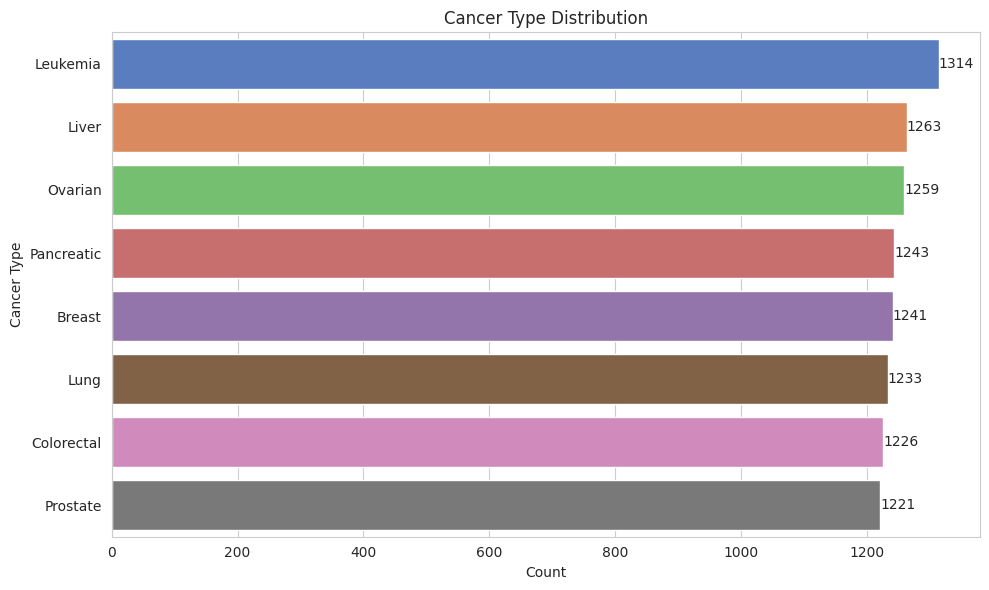

In [19]:
#Cancer type distribution

#1. sort cancer type ascending order
# Visualize cancer type in descending order
sort_cancer_Type = cancer['Cancer_Type'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.countplot(data=cancer, y='Cancer_Type', order=sort_cancer_Type, palette="muted")
plt.title('Cancer Type Distribution')
plt.xlabel('Count')
plt.ylabel('Cancer Type')
plt.bar_label(plt.gca().containers[0])
plt.tight_layout()
plt.show()


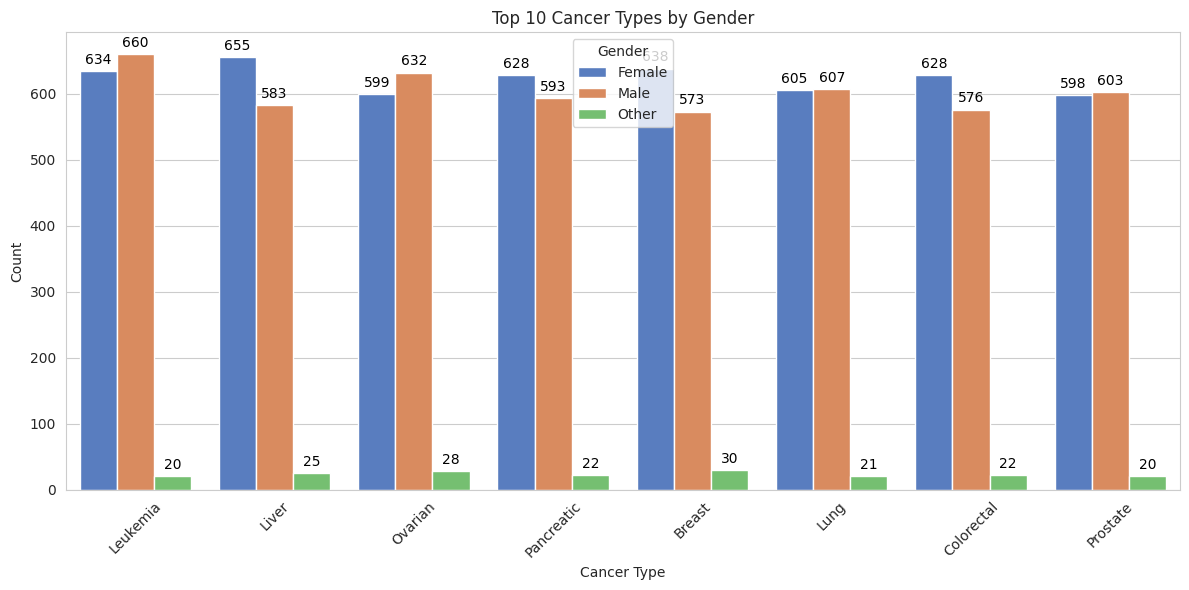

In [20]:
#Distribution of top 10 cancer type by gender
plt.figure(figsize=(12, 6))
sns.countplot(
    data=cancer,
    x='Cancer_Type',
    hue='Gender',
    order=cancer['Cancer_Type'].value_counts().index[:10],
    palette='muted'
)
plt.title('Top 10 Cancer Types by Gender')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add labels to each bar
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()



#Some cancer types are sex-specific, meaning only one biological sex can typically develop them:


**Cancer Type	Expected Gender**

Ovarian	Female only

Prostate	Male only

Breast	Mostly Female (but Males can have it too, rarely)

But based on the plot:

Males are showing up with Ovarian cancer

Females are showing up with Prostate cancer

Ovarian cancer, which is exclusive to individuals assigned female at birth, appears in male and 'Other' gender categories.

Similarly, prostate cancer, which is male-specific, is also recorded under female and 'Other' categories.

These inconsistencies suggest potential data entry errors, misclassification, or anomalies introduced during data aggregation. As a result:

These entries do not align with clinical realities 

For integrity and accuracy, we will either exclude or correct these records when appropriate, or flag them for sensitivity testing in modeling stages.

**Why this matters**:
Accurate gender-specific disease labeling is essential, especially for machine learning models. Ignoring such inconsistencies can introduce bias, reduce model performance, and mislead interpretations, particularly in clinical and public health decision-making.

In [21]:
# Lets see proportions by Gender and Cancer_Type
gender_cancer_check = cancer.groupby(['Cancer_Type', 'Gender']).size().unstack(fill_value=0)
gender_cancer_check.loc[["Ovarian", "Prostate"]]

Gender,Female,Male,Other
Cancer_Type,,,
Ovarian,599,632,28
Prostate,598,603,20


**Objective**

We want to remove or correct biologically implausible rows—like:

Males listed with ovarian cancer.

Females listed with prostate cancer.

*Check unique combinations of Gender and Cancer_Type.*

Identify mismatches: like "Ovarian" with "Male".

Flag or filter those rows.

Optionally: log them for record keeping.

Drop or fix them

In [22]:
# Step 1: Remove biologically incorrect entries
# Define conditions that indicate incorrect rows
condition_male_with_ovarian = (cancer['Gender'].str.lower() == 'male') & (cancer['Cancer_Type'].str.lower().str.contains('ovarian')) # standadize gender in lower case in ovarian cancer type
# Note: Using str.contains() to check for any mention of "ovarian" in Cancer_Type
# This is useful if there are variations like "Ovarian Carcinoma", etc.
condition_female_with_prostate = (cancer['Gender'].str.lower() == 'female') & (cancer['Cancer_Type'].str.lower().str.contains('prostate'))

# Combine them into one mask
invalid_rows = cancer[condition_male_with_ovarian | condition_female_with_prostate]

# u can preview invalid entries before dropping
print("Invalid gender-cancer type combinations found:\n", invalid_rows[['Patient_ID', 'Gender', 'Cancer_Type']])

# Now drop them from the original dataset
cancer_v2 = cancer[~(condition_male_with_ovarian | condition_female_with_prostate)]

# Confirm drop
#print(f"\nDropped {len(can) - len(df_cleaned)} rows. New dataset shape: {df_cleaned.shape}")
cancer_v2[['Gender','Cancer_Type']] 
condition_male_with_ovarian2 = (cancer['Gender'].str.lower() == 'male') & (cancer['Cancer_Type'].str.lower().str.contains('ovarian'))
condition_male_with_ovarian2

Invalid gender-cancer type combinations found:
      Patient_ID  Gender Cancer_Type
6     PAT000007    Male     Ovarian
24    PAT000025    Male     Ovarian
32    PAT000033  Female    Prostate
53    PAT000054  Female    Prostate
56    PAT000057  Female    Prostate
...         ...     ...         ...
9966  PAT009967  Female    Prostate
9969  PAT009970  Female    Prostate
9983  PAT009984    Male     Ovarian
9995  PAT009996    Male     Ovarian
9996  PAT009997    Male     Ovarian

[1230 rows x 3 columns]


0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

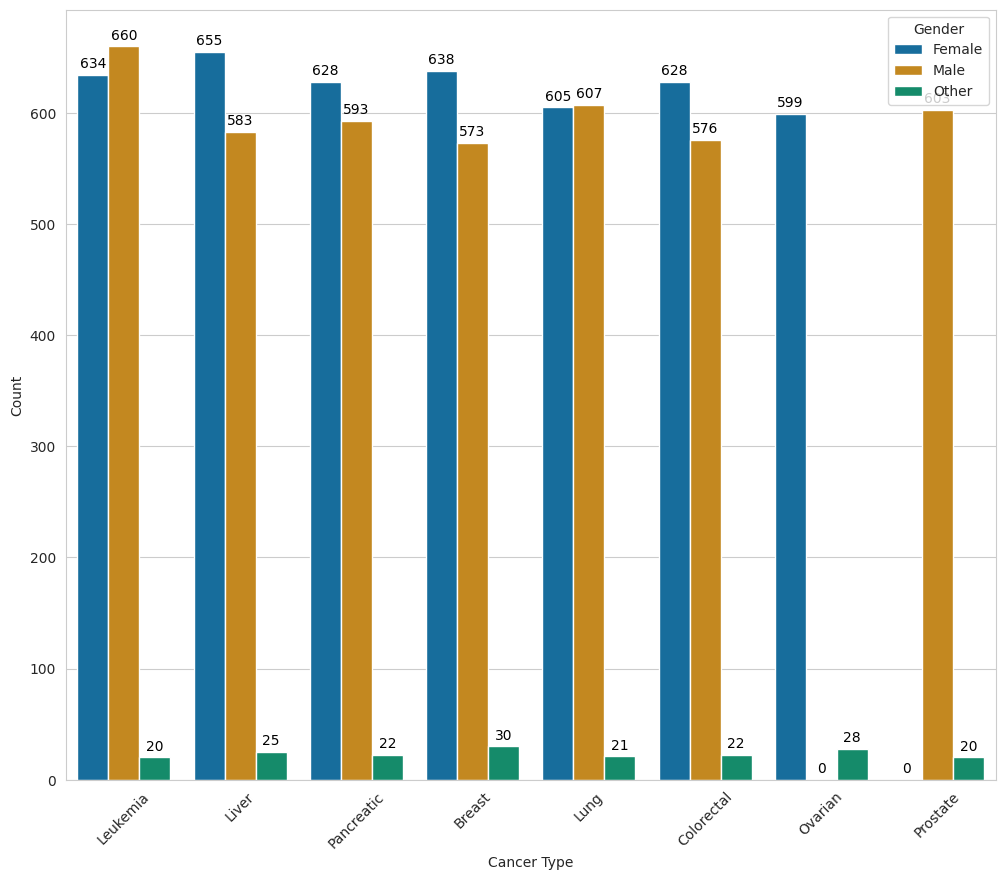

In [23]:
# This code visualizes the distribution of the top 10 most common cancer types in the `cancer_v2` dataset,
# broken down by gender. It uses a countplot with a colorblind-friendly palette for accessibility.
# The x-axis labels are rotated for better readability.
# Bar labels showing exact counts are added to the edge of each bar for clarity.

plt.figure(figsize=(12,10))  # Set the figure size
sns.countplot(
    data=cancer_v2,
    x='Cancer_Type',
    hue='Gender',
    order=cancer_v2['Cancer_Type'].value_counts().index[:10],  # Show only the top 10 cancer types
    palette='colorblind'  # Use a colorblind-friendly palette
)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('Cancer Type')  
plt.ylabel('Count')       

# Add count labels to each bar
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

plt.show()  


LETS EXPLORE COMOBIDITIES

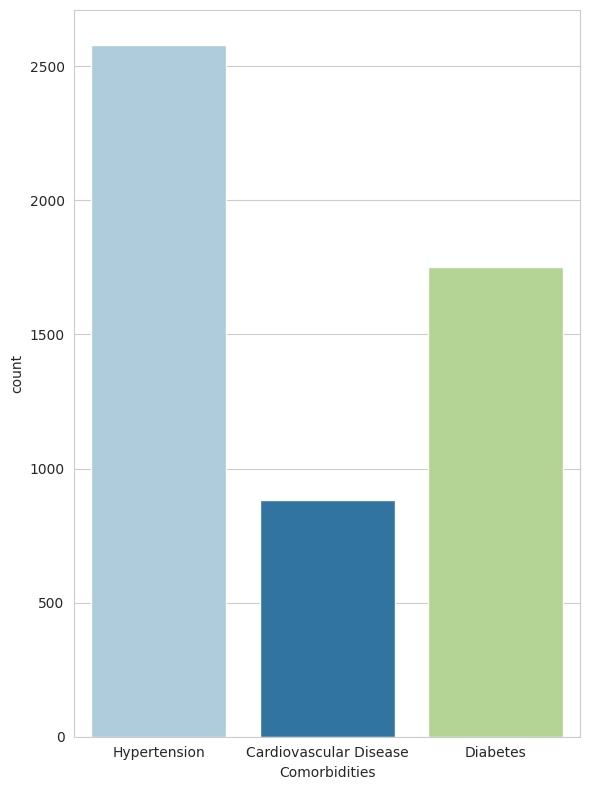

In [24]:
# Now we create a vertical countplot showing the distribution of comorbidities
# in the `cancer_v2` dataset. 

plt.figure(figsize=(6,8))  # Set the size of the figure
sns.countplot(
    data=cancer_v2,
    x='Comorbidities',
    palette='Paired'  # try to use colors like paired color palette for distinct colors
)
plt.tight_layout()
plt.show()  # Display the plot


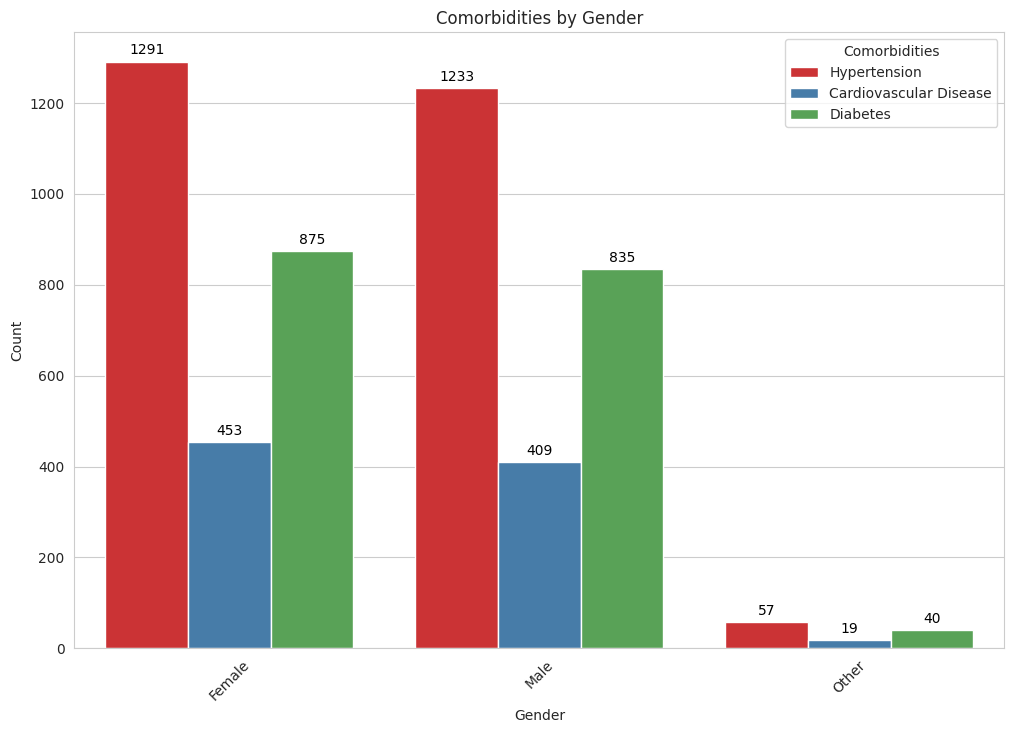

In [25]:
# plot top 10 
# This plot shows the count of different comorbidities within each gender group.
# The bars are grouped by 'Comorbidities'.
# It includes count labels for each bar and rotates x-axis labels for better readability.

plt.figure(figsize=(12,8))  # Set the figure size

sns.countplot(
    data=cancer_v2,
    x='Gender',  # Gender is on the x-axis
    hue='Comorbidities',  # Bars are grouped by comorbidities
    order=cancer_v2[cancer_v2['Gender'].notnull()]['Gender'].value_counts().index[:10],
    palette='Set1'
)

plt.xlabel('Gender')  # Corrected: X-axis is Gender, not Cancer Type
plt.ylabel('Count')
plt.title('Comorbidities by Gender')  
plt.xticks(rotation=45)
plt.legend(title='Comorbidities')

# Add count labels to each bar
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

plt.show()


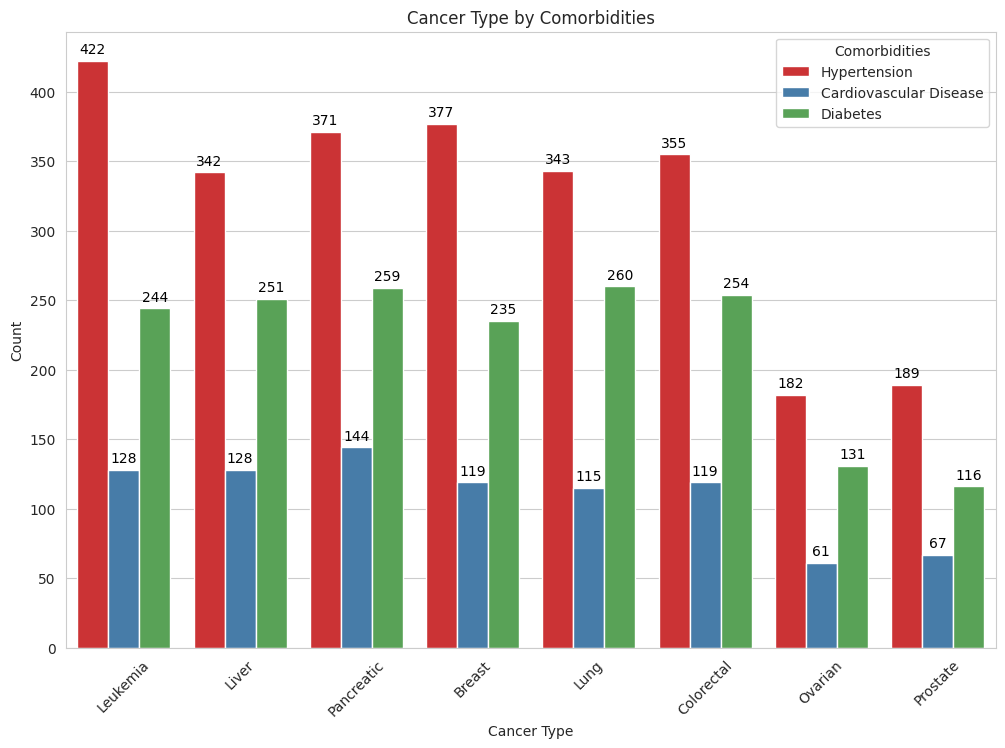

In [26]:
# here we create a countplot grouped by 'Comorbidities' for the top 10 cancer types

plt.figure(figsize=(12,8))  # Set the overall figure size

sns.countplot(
    data=cancer_v2,
    x='Cancer_Type',
    hue='Comorbidities',
    order=cancer_v2[cancer_v2['Cancer_Type'].notnull()]['Cancer_Type'].value_counts().index[:10],  # Top 10 cancer types
    palette='Set1'  # Distinct color palette
)

# Set axis labels and title
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Cancer Type by Comorbidities')

# Improve readability of x-axis labels
plt.xticks(rotation=45)

# Set legend title
plt.legend(title='Comorbidities')

# Add count labels to each bar
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

# Display the plot
plt.show()



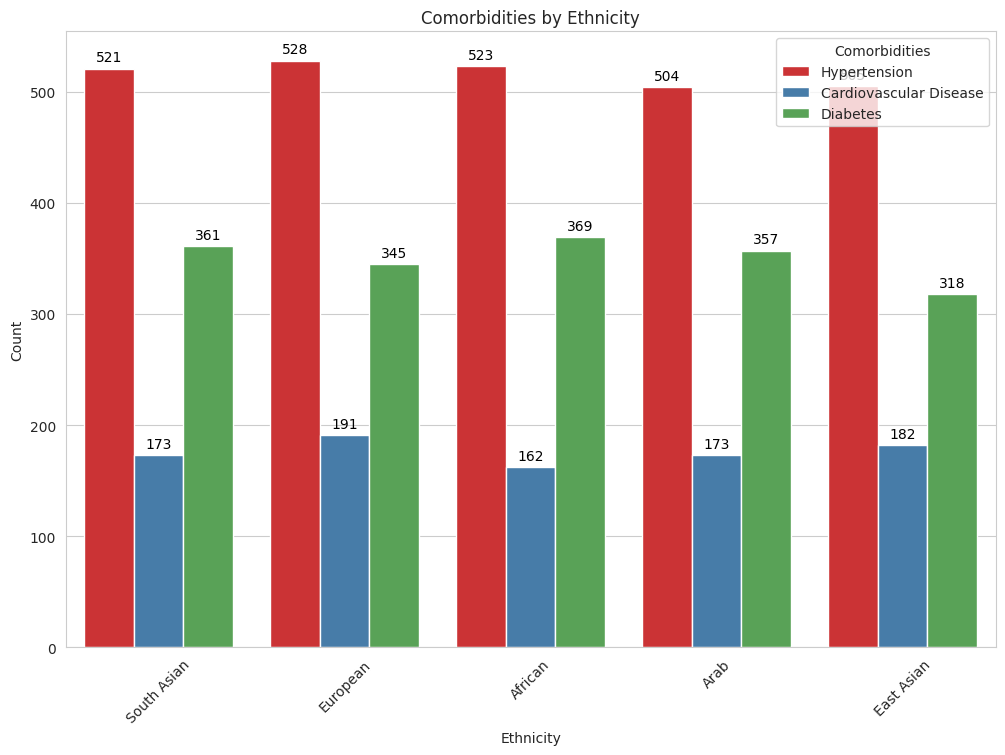

In [27]:
# In this session, we group bar chart showing counts of comorbidities across ethnicities

plt.figure(figsize=(12,8))  # Set figure size

sns.countplot(
    data=cancer_v2,
    x='Ethnicity',
    hue='Comorbidities',
    order=cancer_v2[cancer_v2['Ethnicity'].notnull()]['Ethnicity'].value_counts().index[:10],  # Top 10 ethnicities
    palette='Set1'  # try to Use a distinct, qualitative color palette
)
#set the labels
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Comorbidities by Ethnicity')

plt.xticks(rotation=45)  # Rotate x-axis labels 45 degress
plt.legend(title='Comorbidities')  # Add legend title

# Add count labels to each bar
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

plt.show()  # Display the plot


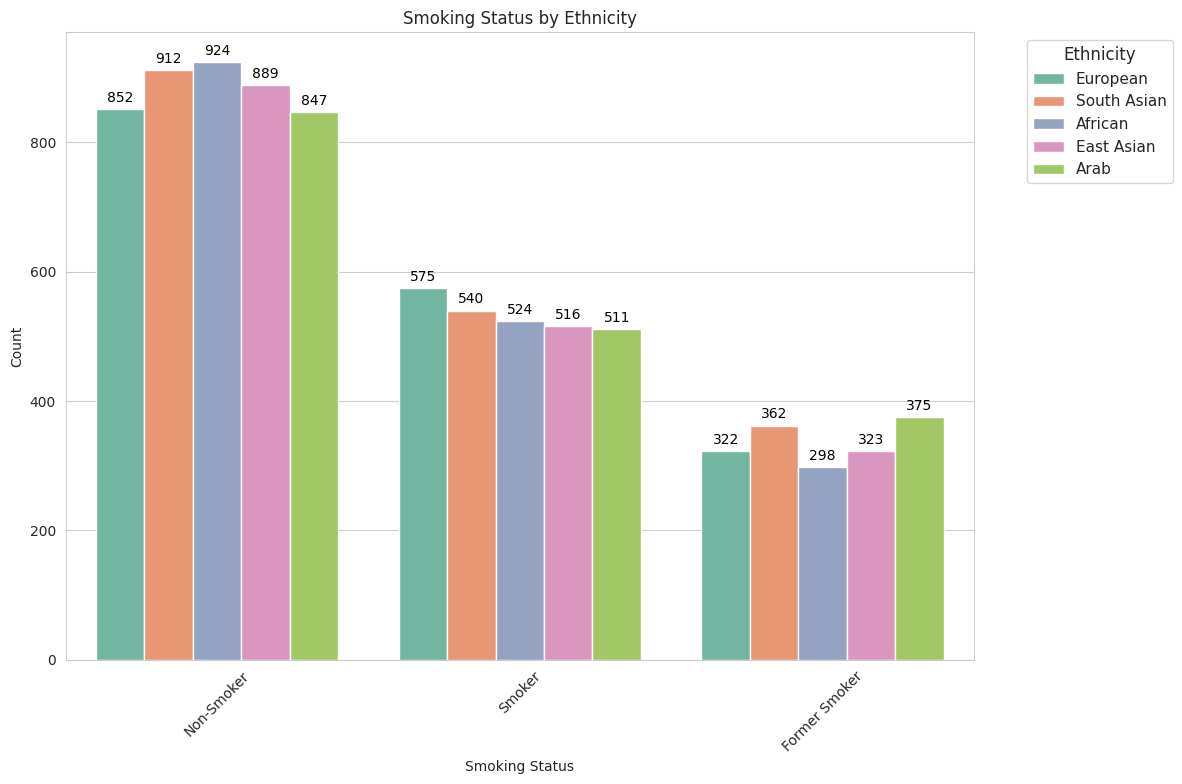

In [28]:
# Here we count plot with Smoking_Status grouped by Ethnicity

plt.figure(figsize=(12,8))  # We set the figure size

sns.countplot(
    data=cancer_v2,
    x='Smoking_Status',
    hue='Ethnicity',
    order=cancer_v2[cancer_v2['Smoking_Status'].notnull()]['Smoking_Status'].value_counts().index[:10],
    palette='Set2')  

# Add bar labels for each bar
for container in plt.gca().containers:  
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

# Apply consistent Seaborn theme and style
sns.set_theme(style="whitegrid")  # Applies a clean white grid background
sns.set_palette("pastel")  # Override earlier 'Set2' if used after the plot (doesn't affect current plot)
sns.axes_style("darkgrid")  # This line won't take effect as it's not applied; use sns.set_style instead

# Set axis labels and rotate x-ticks as usual 45 degrees
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.title('Smoking Status by Ethnicity')  # Optional: Add a title for clarity
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside if crowded

plt.tight_layout()  # this will prevent label cutoff
plt.show()


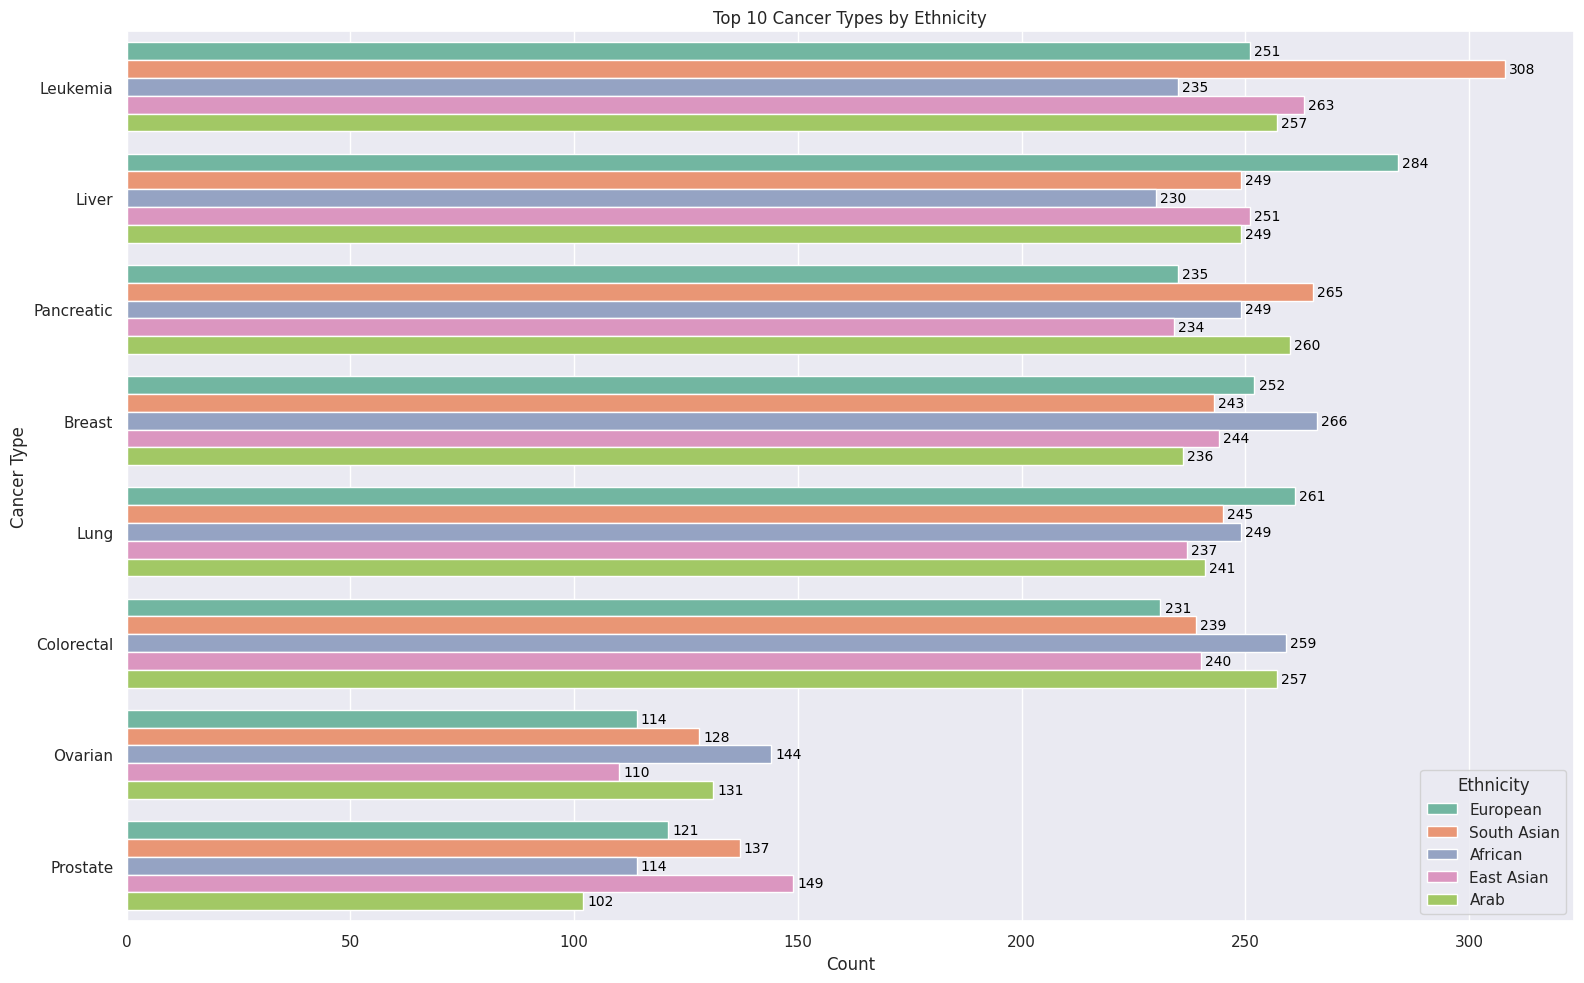

In [29]:
# Lets Set Seaborn theme and palette BEFORE plotting
sns.set_theme(style="whitegrid")
sns.set_style("darkgrid")
sns.set_palette("Set2")  

plt.figure(figsize=(16,10))

# Horizontal grouped bar chart of top 10 cancer types by ethnicity
sns.countplot(
    data=cancer_v2,
    y='Cancer_Type',
    hue='Ethnicity',
    order=cancer_v2[cancer_v2['Cancer_Type'].notnull()]['Cancer_Type'].value_counts().index[:10]
)

# Add labels to all bars dynamically
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black')

# Correct axis labels
plt.xlabel('Count')
plt.ylabel('Cancer Type')
plt.title('Top 10 Cancer Types by Ethnicity')

plt.tight_layout()
plt.show()


In [30]:
w_h = cancer_v2[['Weight', 'Height']]  # Check for missing values in 'Weight'
w_h.describe()

,Weight,Height
count,8770.000000,8770.000000
mean,69.506043,169.293273
std,14.967316,10.052954
min,18.000000,131.000000
25%,60.000000,163.000000
50%,70.000000,169.000000
75%,80.000000,176.000000
max,122.000000,208.000000


In [31]:
#check missing values
w_h.isna().sum()


Weight    0
Height    0
dtype: int64

# calculate BMI Values

In [32]:
cancer_v2['BMI'] = cancer_v2['Weight'] / ((cancer_v2['Height'] / 100) ** 2)  # Calculate BMI
#rounding to 2 decimal places
cancer_v2['BMI'] = cancer_v2['BMI'].round(2) 
cancer_v2[['BMI']]  # Check the calculated BMI values

#get the describive statistics
cancer_v2[['BMI']].describe()

,BMI
count,8770.000000
mean,24.505780
std,6.058838
min,5.670000
25%,20.290000
50%,24.160000
75%,28.390000
max,53.370000


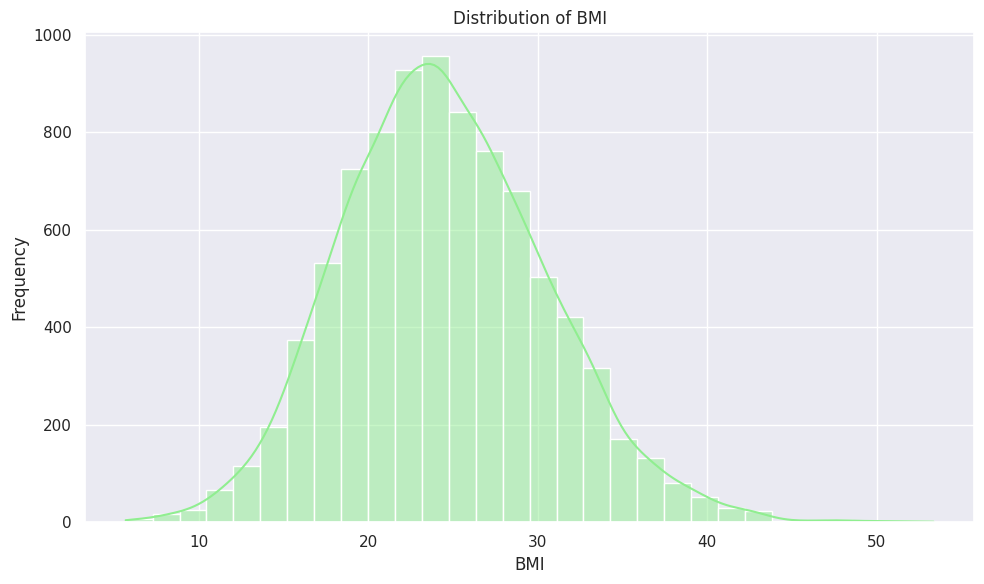

In [33]:
#check BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(cancer_v2['BMI'], bins=30, kde=True, color='lightgreen')

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

     #NEXT
1.***Date variables – Convert these to proper datetime format:
        Diagnosis_Date
        Treatment_Start_Date
        Death_Date***

In [34]:
# convert and ensure all data are in datetime value
cancer_v2['Death_Date'] = pd.to_datetime(cancer_v2['Death_Date'], errors='coerce')
cancer_v2['Diagnosis_Date'] = pd.to_datetime(cancer_v2['Diagnosis_Date'], errors='coerce')
cancer_v2['Treatment_Start_Date'] = pd.to_datetime(cancer_v2['Treatment_Start_Date'], errors='coerce')

cancer_v2[['Diagnosis_Date', 'Treatment_Start_Date', 'Death_Date']]

,Diagnosis_Date,Treatment_Start_Date,Death_Date
0,2020-11-30,2020-12-04,NaT
1,2015-10-10,2015-11-05,NaT
2,2018-02-13,2018-08-03,NaT
3,2022-02-04,2022-03-13,NaT
4,2019-12-03,2020-02-29,NaT
...,...,...,...
9993,2020-01-06,2020-01-18,NaT
9994,2020-04-12,2020-10-03,NaT
9997,2016-06-11,2016-10-21,NaT
9998,2018-11-12,2019-02-05,NaT


****we might what to check rows with Nat (Not a Date) to conform everything is very fine****

In [35]:
cancer_v2[['Diagnosis_Date', 'Treatment_Start_Date', 'Death_Date']].isna().sum()  # Check for any NaT values after conversion
                                          

                                                                #OR


cancer_v2[cancer_v2['Diagnosis_Date'].isna() | cancer_v2['Treatment_Start_Date'].isna() | cancer_v2['Death_Date'].isna()]  # Display rows with NaT values in any of the date columns




cancer_v2[['Diagnosis_Date', 'Treatment_Start_Date', 'Death_Date']]

,Diagnosis_Date,Treatment_Start_Date,Death_Date
0,2020-11-30,2020-12-04,NaT
1,2015-10-10,2015-11-05,NaT
2,2018-02-13,2018-08-03,NaT
3,2022-02-04,2022-03-13,NaT
4,2019-12-03,2020-02-29,NaT
...,...,...,...
9993,2020-01-06,2020-01-18,NaT
9994,2020-04-12,2020-10-03,NaT
9997,2016-06-11,2016-10-21,NaT
9998,2018-11-12,2019-02-05,NaT


**AS AT THE TIME I WAS ANALYSING AND exploring the dataset, I checked for values that are set in the future —meaning dates beyond today. I did this to ensure our data makes logical sense because a future death date likely indicates a data entry error. Identifying these helps us maintain data quality and avoid misleading results in survival or time-to-event analyses. It’s a simple but important step to make sure our findings are accurate and trustworthy.**


**SO lets do this checks together to ensure that all the dates we have are within time that is does not exceed today**

In [36]:
#lets first get todays date
today = pd.to_datetime('today')
today

# we now check if any date exceeds today
date_columns = ['Diagnosis_Date', 'Treatment_Start_Date', 'Death_Date']
date_exceeds_today = (cancer_v2[date_columns] > today).any(axis=1)

# Display only those columns for rows where any date exceeds today
sorted_dates = cancer_v2.loc[date_exceeds_today, date_columns].sort_values(by=['Death_Date','Diagnosis_Date','Treatment_Start_Date'],ascending=False)
sorted_dates



,Diagnosis_Date,Treatment_Start_Date,Death_Date
3606,2023-09-11,2023-12-21,2026-05-15
8894,2023-11-29,2024-03-28,2026-04-12
9167,2024-01-09,2024-02-02,2026-04-11
7193,2024-02-06,2024-04-26,2026-03-12
3923,2023-07-14,2023-09-08,2026-03-12
2168,2024-01-03,2024-06-22,2026-02-07
7745,2023-06-06,2023-09-03,2026-02-06
1902,2023-10-10,2024-01-04,2026-02-05
8811,2023-05-07,2023-09-17,2026-01-29
9899,2024-01-20,2024-05-28,2026-01-21


In [37]:
#WE CHECK THE NUMBER OF ROWS WITH DATES THAT EXCEED TODAY
sorted_dates.shape

(32, 3)

**SO ABOVE WE CAN SEE THAT THERE ARE 35 ROWS WITH DATE BEYONG TODAY AS AT THE TIME OF THIS ANALYSIS**

**WE USE A MORE SMARTER APPROACH FOR THE DATES THAT EXCEED TODAY'S DAY THAT IS IF WE want to make the filtering even more general and scalable, we could use today's date directly to filter out any Death_Date that exceeds today's date**

**This way, if someone runs the codes in 2030, it still works without needing manual year checks.**

In [38]:
# Keep only valid death dates (in the past or today) and we create a new version of our dataset
cancer_v3 = cancer_v2[ (cancer_v2['Death_Date'].isna()) | (cancer_v2['Death_Date'] <= today) ].copy()

#sort death date to make sure its within time
cancer_v3['Death_Date'].sort_values(ascending=False)


8672   2025-05-29
8222   2025-05-28
6896   2025-05-28
9837   2025-05-23
2831   2025-05-21
          ...    
9993          NaT
9994          NaT
9997          NaT
9998          NaT
9999          NaT
Name: Death_Date, Length: 8738, dtype: datetime64[ns]

**#MORE INSIGHTFUL UPDATE COMING SOON KINDLY CHECK BACK SOON**

✅ Next Steps in Cleaning:

Check for missing values across all features.

Clean Comorbidities, Cause_of_Death, and Outcome (if needed).

Handle duplicate entries.

Calculate new features like:

Survival_Days: from diagnosis to either death or today

BMI: from height and weight